# Đọc dữ liệu

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
filedata= 'clean_data.csv'
df = pd.read_csv(filedata)
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


# Chuẩn hóa dữ liệu

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [4]:
df.destination=encoder.fit_transform(df.destination)
df.passanger=encoder.fit_transform(df.passanger)
df.weather=encoder.fit_transform(df.weather)
df.time=encoder.fit_transform(df.time)
df.coupon=encoder.fit_transform(df.coupon)
df.age=encoder.fit_transform(df.age)
df.expiration=encoder.fit_transform(df.expiration)
df.gender=encoder.fit_transform(df.gender)
df.maritalStatus=encoder.fit_transform(df.maritalStatus)
df.education=encoder.fit_transform(df.education)
df.occupation=encoder.fit_transform(df.occupation)
df.income=encoder.fit_transform(df.income)
df.Bar=encoder.fit_transform(df.Bar)
df.CoffeeHouse=encoder.fit_transform(df.CoffeeHouse)
df.CarryAway=encoder.fit_transform(df.CarryAway)
df.RestaurantLessThan20=encoder.fit_transform(df.RestaurantLessThan20)
df.Restaurant20To50=encoder.fit_transform(df.Restaurant20To50)

In [5]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
1,1,1,2,80,0,2,1,1,0,2,...,3,1,1,3,1,0,0,0,1,0
2,1,1,2,80,0,0,0,1,0,2,...,3,1,1,3,1,0,0,0,1,1
3,1,1,2,80,0,1,1,1,0,2,...,3,1,1,3,1,1,0,0,1,0
4,1,1,2,80,2,2,0,1,0,2,...,3,1,1,3,1,0,0,0,1,0


# Tách tập train và test

In [6]:
data = np.array(df.values)
X=data[:,:-1]
X = np.asarray(X.astype(np.float32))
y = data[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [8]:
def getCM(y_test,y_pred):
    TP=0
    TN=0
    FP=0
    FN=0
    for i in range(len(y_test-1)):
        if y_pred[i]==1 and y_test[i]==1:
            TP=TP+1
        elif y_pred[i]==0 and y_test[i]==0:
            TN=TN+1
        elif y_pred[i]==1 and y_test[i]==0:
            FP=FP+1
        elif y_pred[i]==0 and y_test[i]==1:
            FN=FN+1
    return TP,TN,FP,FN

In [9]:
def confusion_matrix_func(TP,TN,FP,FN):
    confusion_matrix={' ':['Predicted as Positive','Predicted as Negative'],
                     'Actual: Positive':[TP,FN],
                     'Actual: Negative':[FP,TN]}
    df_matrix = pd.DataFrame(confusion_matrix)
    return df_matrix

# Giải thuật Decision Tree 

In [10]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_pred_dt = dt_clf.predict(X_test)
TP_dt,TN_dt,FP_dt,FN_dt=getCM(y_test,y_pred_dt)

In [11]:
df_matrix_dt =confusion_matrix_func(TP_dt,TN_dt,FP_dt,FN_dt)
print(df_matrix_dt)

                          Actual: Positive  Actual: Negative
0  Predicted as Positive              1464               835
1  Predicted as Negative               933              1184


# Giải thuật Random Forest

In [12]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_pred_rf = rf_clf.predict(X_test)
TP_rf,TN_rf,FP_rf,FN_rf=getCM(y_test,y_pred_rf)

In [13]:
df_matrix_rf =confusion_matrix_func(TP_rf,TN_rf,FP_rf,FN_rf)
print(df_matrix_rf)

                          Actual: Positive  Actual: Negative
0  Predicted as Positive              1577               814
1  Predicted as Negative               820              1205


# Giải thuật Naive Bayes

In [14]:
from sklearn import naive_bayes
nb_clf = naive_bayes.GaussianNB()
nb_clf.fit(X_train,y_train)
y_pred_nb = nb_clf.predict(X_test)
TP_nb,TN_nb,FP_nb,FN_nb=getCM(y_test,y_pred_nb)

In [15]:
df_matrix_nb =confusion_matrix_func(TP_nb,TN_nb,FP_nb,FN_nb)
print(df_matrix_nb)

                          Actual: Positive  Actual: Negative
0  Predicted as Positive              1502              1054
1  Predicted as Negative               895               965


# Giải thuật Logistic Regression

In [16]:
from sklearn import linear_model
lr_clf = linear_model.LogisticRegression(solver='lbfgs', max_iter=500)
lr_clf.fit(X_train,y_train)
y_pred_lr = lr_clf.predict(X_test)
TP_lr,TN_lr,FP_lr,FN_lr=getCM(y_test,y_pred_lr)

In [17]:
df_matrix_lr =confusion_matrix_func(TP_lr,TN_lr,FP_lr,FN_lr)
print(df_matrix_lr)

                          Actual: Positive  Actual: Negative
0  Predicted as Positive              1642              1145
1  Predicted as Negative               755               874


# Đánh giá

In [18]:
def all_score(TP,TN,FP,FN):
    precision=TP/(TP+FP)
    recall=TP/(TP+FN)
    f1=2*(precision*recall)/((precision+recall))
    accuracy=(TP+TN)/(FP+FN+TP+TN)
    return precision,recall,f1,accuracy

In [19]:
precision_dt,recall_dt,f1_dt,accuracy_dt=all_score(TP_dt,TN_dt,FP_dt,FN_dt)
precision_rf,recall_rf,f1_rf,accuracy_rf=all_score(TP_rf,TN_rf,FP_rf,FN_rf)
precision_nb,recall_nb,f1_nb,accuracy_nb=all_score(TP_nb,TN_nb,FP_nb,FN_nb)
precision_lr,recall_lr,f1_lr,accuracy_lr=all_score(TP_lr,TN_lr,FP_lr,FN_lr)

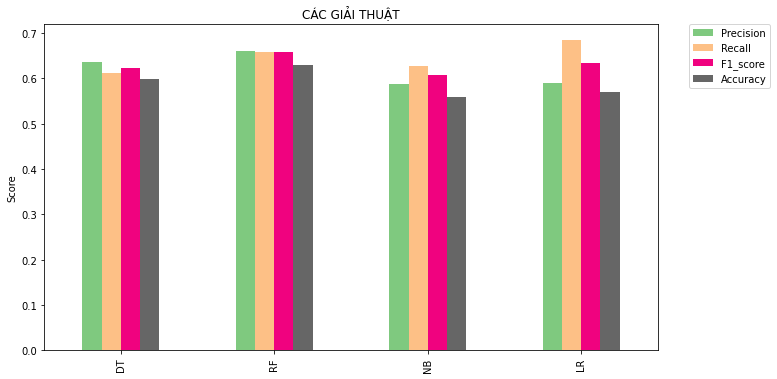

In [20]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
data={'Name': ['DT', 'RF', 'NB', 'LR'], 'Precision': [precision_dt,precision_rf,precision_nb,precision_lr],
     'Recall': [recall_dt,recall_rf,recall_nb,recall_lr],
     'F1_score': [f1_dt,f1_rf,f1_nb,f1_lr],
     'Accuracy': [accuracy_dt,accuracy_rf,accuracy_nb,accuracy_lr]}

df_score = pd.DataFrame(data)
df_score.plot(kind='bar', figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(4), df_score.Name)
plt.ylabel('Score')
plt.title('CÁC GIẢI THUẬT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
df_score

,Name,Precision,Recall,F1_score,Accuracy
0,DT,0.636799,0.610763,0.623509,0.599638
1,RF,0.659557,0.657906,0.658730,0.629982
2,NB,0.587637,0.626617,0.606501,0.558650
3,LR,0.589164,0.685023,0.633488,0.569746
